# MLB Player Statistics 2015 - 2018

In this project I will be reviewing MLB statisitcs. I am attempting to figure out which individual statistics are best used to predict success a hitter. When I find the best statistic to use, I will determine who the top hitters in the league are from 2015-2018. My plan is to reverse engineer it by looking at the statistics of the best pitchers in the major leagues and seeing what makes them so good. Then I can look at the hitters statistics to find the best hitters in the MLB.

This information should be useful for any MLB front office as well as people who are looking for an edge in Fantasy Baseball. People who love baseball could also maybe use this.

I am hoping to find the best hitters and pitchers in the MLB from 2015-2018. 

This should be valid if I am able to compare the players stats to MLB averages.

Challenges include possibly not having enough data or the right data that is needed to complete the task. 

By Greg Seda

Class: Data Analytics Using Python

**Load packages:**

In [1]:
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import numpy as np

### Load the Data from Excel

Importing the csv into pandas dataframes.

In [2]:
atbats = pd.read_csv('atbats.csv', index_col=0)
player_names = pd.read_csv('player_names.csv', index_col=0)

### Checking to See What We are Working With

Before examining the data, I will be checking to see the types of data that is being loaded in. If there is any data not needed, I will remove it. Then I will rename all of columns.

In [3]:
atbats.shape

(740389, 10)

In [4]:
atbats.head()

,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
ab_id,,,,,,,,,,
2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


In [5]:
atbats.tail()

,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
ab_id,,,,,,,,,,
2018185570,543768,Groundout,201802431,9,3,1,L,448802,L,True
2018185571,502517,Strikeout,201802431,9,1,3,L,623352,L,False
2018185572,450314,Flyout,201802431,9,2,3,L,623352,R,False
2018185573,595879,Single,201802431,9,2,3,L,623352,R,False
2018185574,519203,Flyout,201802431,9,3,3,L,623352,L,False


In [6]:
atbats.dtypes

batter_id      int64
event         object
g_id           int64
inning         int64
o              int64
p_score        int64
p_throws      object
pitcher_id     int64
stand         object
top             bool
dtype: object

In [7]:
atbats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740389 entries, 2015000001 to 2018185574
Data columns (total 10 columns):
batter_id     740389 non-null int64
event         740389 non-null object
g_id          740389 non-null int64
inning        740389 non-null int64
o             740389 non-null int64
p_score       740389 non-null int64
p_throws      740389 non-null object
pitcher_id    740389 non-null int64
stand         740389 non-null object
top           740389 non-null bool
dtypes: bool(1), int64(6), object(3)
memory usage: 57.2+ MB


In [8]:
atbats.index

Int64Index([2015000001, 2015000002, 2015000003, 2015000004, 2015000005,
            2015000006, 2015000007, 2015000008, 2015000009, 2015000010,
            ...
            2018185565, 2018185566, 2018185567, 2018185568, 2018185569,
            2018185570, 2018185571, 2018185572, 2018185573, 2018185574],
           dtype='int64', name='ab_id', length=740389)

In [9]:
player_names.shape

(2218, 2)

In [10]:
player_names.head()

,first_name,last_name
id,,
452657,Jon,Lester
425794,Adam,Wainwright
457435,Phil,Coke
435400,Jason,Motte
519166,Neil,Ramirez


In [11]:
player_names.tail()

,first_name,last_name
id,,
582473,Sherman,Johnson
664702,Myles,Straw
624641,Edmundo,Sosa
605612,Harold,Castro
542932,Jon,Berti


In [12]:
player_names.dtypes

first_name    object
last_name     object
dtype: object

In [13]:
player_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 452657 to 542932
Data columns (total 2 columns):
first_name    2218 non-null object
last_name     2218 non-null object
dtypes: object(2)
memory usage: 52.0+ KB


In [14]:
player_names.index

Int64Index([452657, 425794, 457435, 435400, 519166, 593372, 467008, 477229,
            444468, 572096,
            ...
            621529, 623214, 621514, 621466, 607333, 582473, 664702, 624641,
            605612, 542932],
           dtype='int64', name='id', length=2218)

## Drop the Unwanted Columns

In [15]:
atbats.drop('stand', axis=1, inplace=True)

In [16]:
atbats.drop('p_score', axis=1, inplace=True)

In [17]:
atbats.drop('p_throws', axis=1, inplace=True)

In [18]:
atbats.head()

,batter_id,event,g_id,inning,o,pitcher_id,top
ab_id,,,,,,,
2015000001,572761,Groundout,201500001,1,1,452657,True
2015000002,518792,Double,201500001,1,1,452657,True
2015000003,407812,Single,201500001,1,1,452657,True
2015000004,425509,Strikeout,201500001,1,2,452657,True
2015000005,571431,Strikeout,201500001,1,3,452657,True


## Rename the Columns to More Familiar Names

In [19]:
enc_dict = {'Single': '1B','Double': '2B','Triple': '3B','Home Run': 'HR','Walk': 'BB',
            'Intent Walk': 'IBB','Hit By Pitch': 'HBP','Strikeout': 'K','Sac Fly': 'SF',
            'Grounded Into DP': 'GIDP','Groundout': 'GO','Lineout': 'LO','Pop Out': 'PO',
            'Flyout': 'FO','Fielders Choice': 'FC','Sac Bunt': 'SAC','Double Play': 'DP',
            'Triple Play': 'TP','Batter Interference': 'BI','Fan interference': 'FI',
            'Catcher Interference': 'CI','Field Error': 'ROE','Bunt Groundout': 'BGO',
            'Bunt Lineout': 'BLO','Bunt Pop Out': 'BPO','Fielders Choice Out': 'FCO',
            'Forceout': 'FORCE','Sacrifice Bunt DP': 'SBDP','Strikeout - DP': 'KDP',
            'Runner Out': 'RO','Sac Fly DP': 'SFDP'
           }

### Start to Use the Data Given to Calculate the Statistics

In [20]:
atbats['year'] = (atbats.index//1e6).astype(int)
atbats['event'] = atbats['event'].apply(lambda x: enc_dict[x])
eventcol = atbats['event']
atbats = pd.get_dummies(atbats, columns=['event'], prefix='')
atbats['event'] = eventcol

### Counting Every Outcome for Each Plate Appearance

A plate appearance includes hits, walks, outs and hit-by-pitches. An at bat only includes hits and outs. They will be grouped to make the new columns.

In [21]:
atbats['_H'] = atbats[['_1B', '_2B', '_3B', '_HR']].sum(axis=1)
atbats['_TB'] = atbats['_1B'] + 2*atbats['_2B'] + 3*atbats['_3B'] + 4*atbats['_HR']
atbats['_K'] = atbats['_K'] + atbats['_KDP']
atbats['_BB'] = atbats['_BB'] + atbats['_IBB']
atbats['_AB'] = 1 - atbats[['_CI', '_SAC', '_BB', 
                            '_HBP', '_RO', '_SF']].sum(axis=1)
atbats['_PA'] = 1 - atbats['_RO']

In [22]:
atbats['_outs'] = atbats['o'] - atbats.groupby(['g_id', 
                                                'inning', 
                                                'top'])['o'].shift(1).fillna(0)

In [23]:
stats_to_cum = pd.Index(['H', 'TB', 'PA', 'AB', 'BB', 'HBP', 'IBB', 'K', 
                         '2B', '3B', 'HR', 'GIDP', 'SF'])

batter_groups = atbats.groupby(['batter_id', 'year'])
pitcher_groups = atbats.groupby(['pitcher_id', 'year'])

atbats[stats_to_cum] = (batter_groups['_' + stats_to_cum]
                                     .transform(pd.Series.cumsum)).astype(int)

atbats['opp_' + stats_to_cum] = (pitcher_groups['_' + stats_to_cum]
                                               .transform(pd.Series.cumsum)).astype(int)

atbats['IP'] = pitcher_groups['_outs'].transform(pd.Series.cumsum) / 3

### Calculating the Hitter's Statistics

In [24]:
atbats['AVG'] = atbats['H']/atbats['AB']
atbats['SLG'] = atbats['TB']/atbats['AB']
atbats['OBP'] = atbats[['H', 'BB', 'HBP']].sum(axis=1)/atbats[['AB', 'BB', 'HBP', 
                                                               'SF']].sum(axis=1)

atbats['OPS'] = atbats['SLG'] + atbats['OBP']
atbats['K%'] = atbats['K'] / atbats['AB']
atbats['BB%'] = atbats['BB'] / atbats['AB']
                         
atbats['OPS+'] = (atbats['OBP'] / .320 + atbats['SLG'] / .414 - 1) * 100

### Calculating the Pitcher's Statistics

In [25]:
atbats['opp_AVG'] = atbats['opp_H']/atbats['opp_AB']
atbats['opp_SLG'] = atbats['opp_TB']/atbats['opp_AB']
atbats['opp_OBP'] = (atbats[['opp_H', 'opp_BB', 'opp_HBP']].sum(axis=1) / 
                             atbats[['opp_AB', 'opp_BB', 
                                     'opp_HBP', 'opp_SF']].sum(axis=1))

atbats['opp_OPS'] = atbats['opp_SLG'] + atbats['opp_OBP']
atbats['opp_K%'] = atbats['opp_K'] / atbats['opp_AB']
atbats['opp_BB%'] = atbats['opp_BB'] / atbats['opp_AB']

atbats['FIP'] = (13*atbats['opp_HR'] + 3*(atbats['opp_BB'] + atbats['opp_HBP']) 
                 - 2.0*atbats['opp_K'])/atbats['IP'] + 3.2
atbats['WHIP'] = atbats[['opp_H', 'opp_BB']].sum(axis=1)/atbats['IP']

In [26]:
atbats = atbats.merge(player_names, left_on='batter_id', right_index=True, how='left')
atbats = atbats.merge(player_names, left_on='pitcher_id', right_index=True, 
                      how='left', suffixes=['_batter', '_pitcher'])

# Let's Look at the Data

### Fielding Independent Pitching Leaders

FIP is a statistic that converts a pitchers "three true outcomes" (walk, strikeout, home run) to a earned run average like number. It takes those three outcomes and divides them by the total innings pitched for a player. It is a predictive statistic that can help a pitcher understand that even though they are not getting the right results (giving up a large amount of runs), they should be able to turn it around. Their process is good, but the results are not there yet. The big difference between FIP and ERA are that FIP does not measure the amount of runs allowed. It measures what is in control of the pitcher. This is what I will be basing the top pitchers off of and will help me figure out which hitting statistics are the most important to properly evaluate a batter.

In [27]:
(atbats[atbats['IP']>150].groupby(['pitcher_id', 'year'])
                        .tail(n=1)
                        .sort_values(by='FIP').set_index(['year', 'pitcher_id'])
                         [['FIP', 'IP', 'opp_AVG', 'opp_OBP',
                           'opp_SLG', 'opp_OPS',
                           'first_name_pitcher', 'last_name_pitcher']]
                        .head(n=10))

FIP          IP   opp_AVG   opp_OBP   opp_SLG   opp_OPS  \
year pitcher_id                                                                 
2018 519242      2.016456  158.000000  0.180531  0.243112  0.288496  0.531607   
     594798      2.024885  217.000000  0.195876  0.243990  0.277062  0.521052   
2015 477132      2.056734  232.666667  0.194279  0.237020  0.283671  0.520691   
2016 592789      2.339746  183.666667  0.242775  0.287449  0.351156  0.638605   
     605228      2.366362  182.333333  0.224398  0.287671  0.335843  0.623515   
2015 453562      2.413974  229.000000  0.184957  0.235566  0.271270  0.506836   
2018 545333      2.475665  175.333333  0.207752  0.280112  0.302326  0.582438   
2017 519242      2.495490  214.333333  0.207809  0.254417  0.348866  0.603283   
2018 571578      2.510000  200.000000  0.218329  0.269762  0.336927  0.606689   
2017 446372      2.542062  203.666667  0.192623  0.235142  0.321038  0.556180   

                first_name_pitcher last_name_pitcher  
year pitcher_id                                       
2018 519242                  Chris              Sale  
     594798                  Jacob            deGrom  
2015 477132                Clayton           Kershaw  
2016 592789                   Noah       Syndergaard  
     605228                   Jose         Fernandez  
2015 453562                   Jake           Arrieta  
2018 545333                 Trevor             Bauer  
2017 519242                  Chris              Sale  
2018 571578                Patrick            Corbin  
2017 446372                  Corey            Kluber

### Opponent Batting Average Leaders

The batting average given up a pitcher. 

Calculation: Hits given up / total at bats

In [28]:
(atbats[atbats['IP']>150].groupby(['pitcher_id', 'year'])
                        .tail(n=1)
                        .sort_values(by='opp_AVG').set_index(['year', 'pitcher_id'])
                         [['opp_AVG', 'IP', 'FIP', 'opp_OBP',
                           'opp_SLG', 'opp_OPS',
                           'first_name_pitcher', 'last_name_pitcher']]
                        .head(n=10))

opp_AVG          IP       FIP   opp_OBP   opp_SLG   opp_OPS  \
year pitcher_id                                                                 
2017 453286      0.177715  200.666667  2.925914  0.246452  0.318759  0.565210   
2018 605483      0.177778  180.666667  2.995203  0.253582  0.300000  0.553582   
     519242      0.180531  158.000000  2.016456  0.243112  0.288496  0.531607   
2015 453562      0.184957  229.000000  2.413974  0.235566  0.271270  0.506836   
     425844      0.187342  222.666667  2.827246  0.230585  0.275949  0.506535   
2018 453286      0.188206  220.666667  2.692447  0.247100  0.332497  0.579597   
2017 446372      0.192623  203.666667  2.542062  0.235142  0.321038  0.556180   
2015 477132      0.194279  232.666667  2.056734  0.237020  0.283671  0.520691   
2016 453562      0.194366  197.333333  3.575000  0.277427  0.305634  0.583061   
2018 592314      0.195195  183.000000  3.413115  0.275304  0.324324  0.599628   

                first_name_pitcher last_name_pitcher  
year pitcher_id                                       
2017 453286                    Max          Scherzer  
2018 605483                  Blake             Snell  
     519242                  Chris              Sale  
2015 453562                   Jake           Arrieta  
     425844                   Zack           Greinke  
2018 453286                    Max          Scherzer  
2017 446372                  Corey            Kluber  
2015 477132                Clayton           Kershaw  
2016 453562                   Jake           Arrieta  
2018 592314                   Mike       Foltynewicz

### Opponent On-Base Percentage Leaders

The on-base percentage given up by a pitcher.

Calculation: (Hits given up, walks given up, hit-by-pitches given up) / plate appearances

In [29]:
(atbats[atbats['IP']>150].groupby(['pitcher_id', 'year'])
                        .tail(n=1)
                        .sort_values(by='opp_OBP').set_index(['year', 'pitcher_id'])
                         [['opp_OBP', 'IP', 'FIP', 'opp_AVG',
                           'opp_SLG', 'opp_OPS',
                           'first_name_pitcher', 'last_name_pitcher']]
                        .head(n=10))

opp_OBP          IP       FIP   opp_AVG   opp_SLG   opp_OPS  \
year pitcher_id                                                                 
2015 425844      0.230585  222.666667  2.827246  0.187342  0.275949  0.506535   
2017 446372      0.235142  203.666667  2.542062  0.192623  0.321038  0.556180   
2015 453562      0.235566  229.000000  2.413974  0.184957  0.271270  0.506836   
     477132      0.237020  232.666667  2.056734  0.194279  0.283671  0.520691   
2018 434378      0.241877  214.000000  2.821495  0.199744  0.359795  0.601672   
2015 453286      0.242117  228.666667  2.832653  0.207792  0.357733  0.599850   
2018 519242      0.243112  158.000000  2.016456  0.180531  0.288496  0.531607   
     594798      0.243990  217.000000  2.024885  0.195876  0.277062  0.521052   
2017 477132      0.246291  175.000000  3.114286  0.212168  0.357254  0.603545   
     453286      0.246452  200.666667  2.925914  0.177715  0.318759  0.565210   

                first_name_pitcher last_name_pitcher  
year pitcher_id                                       
2015 425844                   Zack           Greinke  
2017 446372                  Corey            Kluber  
2015 453562                   Jake           Arrieta  
     477132                Clayton           Kershaw  
2018 434378                 Justin         Verlander  
2015 453286                    Max          Scherzer  
2018 519242                  Chris              Sale  
     594798                  Jacob            deGrom  
2017 477132                Clayton           Kershaw  
     453286                    Max          Scherzer

### Opponent Slugging Percentage Leaders

The slugging percentage given up by a pitcher.

Calculation: Total bases allowed / total at bats

In [30]:
(atbats[atbats['IP']>150].groupby(['pitcher_id', 'year'])
                        .tail(n=1)
                        .sort_values(by='opp_SLG').set_index(['year', 'pitcher_id'])
                         [['opp_SLG', 'IP', 'FIP', 'opp_AVG',
                           'opp_OBP', 'opp_OPS',
                           'first_name_pitcher', 'last_name_pitcher']]
                        .head(n=10))

opp_SLG          IP       FIP   opp_AVG   opp_OBP   opp_OPS  \
year pitcher_id                                                                 
2015 453562      0.271270  229.000000  2.413974  0.184957  0.235566  0.506836   
     425844      0.275949  222.666667  2.827246  0.187342  0.230585  0.506535   
2018 594798      0.277062  217.000000  2.024885  0.195876  0.243990  0.521052   
2015 477132      0.283671  232.666667  2.056734  0.194279  0.237020  0.520691   
2018 519242      0.288496  158.000000  2.016456  0.180531  0.243112  0.531607   
     605483      0.300000  180.666667  2.995203  0.177778  0.253582  0.553582   
     545333      0.302326  175.333333  2.475665  0.207752  0.280112  0.582438   
2016 453562      0.305634  197.333333  3.575000  0.194366  0.277427  0.583061   
2018 605400      0.310847  212.333333  3.049294  0.197090  0.259394  0.570241   
2015 572971      0.313817  232.000000  2.984483  0.216628  0.261538  0.575356   

                first_name_pitcher last_name_pitcher  
year pitcher_id                                       
2015 453562                   Jake           Arrieta  
     425844                   Zack           Greinke  
2018 594798                  Jacob            deGrom  
2015 477132                Clayton           Kershaw  
2018 519242                  Chris              Sale  
     605483                  Blake             Snell  
     545333                 Trevor             Bauer  
2016 453562                   Jake           Arrieta  
2018 605400                  Aaron              Nola  
2015 572971                 Dallas           Keuchel

### Opponent On-Base Plus Slugging Leaders

The OPS given up by a pitcher.

Calculation: Opponent OBP plus Oppenent SLG

In [31]:
(atbats[atbats['IP']>150].groupby(['pitcher_id', 'year'])
                        .tail(n=1)
                        .sort_values(by='opp_OPS').set_index(['year', 'pitcher_id'])
                         [['opp_OPS', 'IP', 'FIP', 'opp_AVG',
                           'opp_OBP', 'opp_SLG',
                           'first_name_pitcher', 'last_name_pitcher']]
                        .head(n=10))

opp_OPS          IP       FIP   opp_AVG   opp_OBP   opp_SLG  \
year pitcher_id                                                                 
2015 425844      0.506535  222.666667  2.827246  0.187342  0.230585  0.275949   
     453562      0.506836  229.000000  2.413974  0.184957  0.235566  0.271270   
     477132      0.520691  232.666667  2.056734  0.194279  0.237020  0.283671   
2018 594798      0.521052  217.000000  2.024885  0.195876  0.243990  0.277062   
     519242      0.531607  158.000000  2.016456  0.180531  0.243112  0.288496   
     605483      0.553582  180.666667  2.995203  0.177778  0.253582  0.300000   
2017 446372      0.556180  203.666667  2.542062  0.192623  0.235142  0.321038   
     453286      0.565210  200.666667  2.925914  0.177715  0.246452  0.318759   
2018 605400      0.570241  212.333333  3.049294  0.197090  0.259394  0.310847   
2015 594798      0.573505  191.000000  2.770681  0.214697  0.255061  0.318444   

                first_name_pitcher last_name_pitcher  
year pitcher_id                                       
2015 425844                   Zack           Greinke  
     453562                   Jake           Arrieta  
     477132                Clayton           Kershaw  
2018 594798                  Jacob            deGrom  
     519242                  Chris              Sale  
     605483                  Blake             Snell  
2017 446372                  Corey            Kluber  
     453286                    Max          Scherzer  
2018 605400                  Aaron              Nola  
2015 594798                  Jacob            deGrom

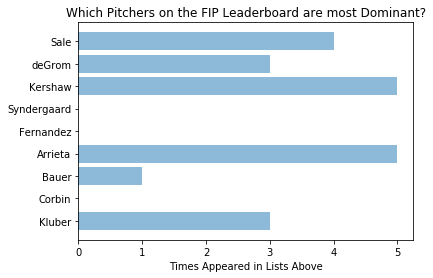

In [32]:
names = ["Kluber", "Corbin", "Bauer", "Arrieta", "Fernandez", "Syndergaard", "Kershaw", "deGrom", "Sale"]
positions = np.arange(len(names))
performance = [3,0,1,5,0,0,5,3,4]

plt.barh(positions, performance, align='center', alpha=0.5)
plt.yticks(positions, names)
plt.xlabel('Times Appeared in Lists Above')
plt.title('Which Pitchers on the FIP Leaderboard are most Dominant?')


plt.show()

# Let's Examine the Pitcher Data

Clearly the most dominant pitchers from 2015-2018 were Clayton Kershaw and Jake Arrieta. Based on a comparison between each statistic to FIP, the on-base percentage and slugging had the most similar leaderboards. So we can assume that OBP and SLG are the most important stats to find out how much damage a hitter can do at the plate. It is curious that on-base plus slugging is not as similar, but we will take a look at that later.  

It is important to note that I put the requirement of pitching 150 innings for the pitcher evaluations. The more innings a pitcher can pitch at a high level, the more valuable they should be for their team.


# Time to look at the hitters

Now that I have viewed the pitching statistics, I will attempt to find the best hitters in the MLB. I will use on-base percentage, slugging and on-base plus slugging during this search. 

### On-base percentage

On-base percentage is a stat that includes the players hits, hit-by-pitches and walks.

In [33]:
(atbats[atbats['AB']>400].groupby(['batter_id', 'year']).tail(n=1)
                                               .sort_values(by='OBP', ascending=False)
                                               .set_index(['year', 'batter_id'])
                                                [['AB', 'H', '2B', '3B', 'HR', 'BB', 
                                                  'IBB', 'K', 'AVG', 'SLG', 'OBP', 'OPS', 
                                                  'OPS+', 'first_name_batter', 
                                                  'last_name_batter']]
                                               .head(n=10))

AB    H  2B  3B  HR   BB  IBB    K       AVG       SLG  \
year batter_id                                                            
2015 547180     521  172  38   1  42  124   15  131  0.330134  0.648752   
2018 545361     471  147  24   4  39  122   25  124  0.312102  0.628450   
2015 458015     545  171  33   2  29  143   15  135  0.313761  0.541284   
2017 458015     559  179  34   1  36  134   20   83  0.320215  0.577818   
     545361     402  123  25   3  33   94   15   90  0.305970  0.629353   
2016 545361     549  173  32   5  29  116   12  137  0.315118  0.550091   
2015 408234     429  145  28   1  18   77   15   82  0.337995  0.533800   
2018 605141     520  180  47   5  32   81    8   91  0.346154  0.640385   
2015 502671     567  182  38   2  33  118   29  151  0.320988  0.569665   
2016 458015     556  181  34   2  29  108   15  120  0.325540  0.550360   

                     OBP       OPS        OPS+ first_name_batter  \
year batter_id                                                     
2015 547180     0.460245  1.108997  200.529931             Bryce   
2018 545361     0.459638  1.088088  195.436281              Mike   
2015 458015     0.458993  1.000277  174.180277              Joey   
2017 458015     0.454031  1.031849  181.454176              Joey   
     545361     0.441815  1.071168  190.084750              Mike   
2016 545361     0.440529  0.990620  170.537438              Mike   
2015 408234     0.440313  0.974113  166.534933            Miguel   
2018 605141     0.438111  1.078495  191.591883            Mookie   
2015 502671     0.435159  1.004823  173.587250              Paul   
2016 458015     0.434269  0.984629  168.646139              Joey   

               last_name_batter  
year batter_id                   
2015 547180              Harper  
2018 545361               Trout  
2015 458015               Votto  
2017 458015               Votto  
     545361               Trout  
2016 545361               Trout  
2015 408234             Cabrera  
2018 605141               Betts  
2015 502671         Goldschmidt  
2016 458015               Votto

Being able to be on this leaderboard is obviously very challenging given that two players appear 3 times each. Every player on this list also has a high batting average and slugging percentage. So while OBP isn't a predictive stat for power, it is clearly an important statistic for scoring runs and being a productive hitter. The more a player gets on base, the better chance they have to score runs. Since scoring runs is vital to winning games, it is clear OBP is the most important stat for a hitter. 

### Slugging Percentage

Slugging percentage includes the total bases the player has gotten divided by the amount of at bats. This stat measures the power of a hitter. 

In [34]:
(atbats[atbats['AB']>400].groupby(['batter_id', 'year']).tail(n=1)
                                               .sort_values(by='SLG', ascending=False)
                                               .set_index(['year', 'batter_id'])
                                                [['AB', 'H', '2B', '3B', 'HR', 'BB', 
                                                  'IBB', 'K', 'AVG', 'SLG', 'OBP', 'OPS', 
                                                  'OPS+', 'first_name_batter', 
                                                  'last_name_batter']]
                                               .head(n=10))

AB    H  2B  3B  HR   BB  IBB    K       AVG       SLG  \
year batter_id                                                            
2017 502110     432  131  26   3  45   53    8  128  0.303241  0.689815   
2015 547180     521  172  38   1  42  124   15  131  0.330134  0.648752   
2018 605141     520  180  47   5  32   81    8   91  0.346154  0.640385   
2017 519317     597  168  32   0  59   85   13  163  0.281407  0.631491   
     545361     402  123  25   3  33   94   15   90  0.305970  0.629353   
2018 502110     569  188  37   2  43   69   11  146  0.330404  0.629174   
     545361     471  147  24   4  39  122   25  124  0.312102  0.628450   
2017 592450     542  154  24   3  52  127   11  208  0.284133  0.627306   
2016 120074     536  169  48   1  38   80   15   84  0.315299  0.621269   
2017 453568     643  213  35  14  37   65    9  134  0.331260  0.601866   

                     OBP       OPS        OPS+ first_name_batter  \
year batter_id                                                     
2017 502110     0.376278  1.066093  184.208848              J.D.   
2015 547180     0.460245  1.108997  200.529931             Bryce   
2018 605141     0.438111  1.078495  191.591883            Mookie   
2017 519317     0.375723  1.007213  169.947301         Giancarlo   
     545361     0.441815  1.071168  190.084750              Mike   
2018 502110     0.402157  1.031331  177.648508              J.D.   
     545361     0.459638  1.088088  195.436281              Mike   
2017 592450     0.421829  1.049135  183.344788             Aaron   
2016 120074     0.401600  1.022869  175.564893             David   
2017 453568     0.399445  1.001311  170.204951           Charlie   

               last_name_batter  
year batter_id                   
2017 502110            Martinez  
2015 547180              Harper  
2018 605141               Betts  
2017 519317             Stanton  
     545361               Trout  
2018 502110            Martinez  
     545361               Trout  
2017 592450               Judge  
2016 120074               Ortiz  
2017 453568            Blackmon

The top sluggers in the game often have high on base percentages, but not nearly as high as the OBP leaders. Slugging is an important stat because you don't just want players who just hit singles. You want players to hit doubles, triples and home runs, so your chance to score is higher. The chance someone scores from first base is much lower than the chance someone scores from third base for example. 

### On-Base plus Slugging

OPS measures the players on-base percentage plus slugging percentage.

In [35]:
(atbats[atbats['AB']>400].groupby(['batter_id', 'year']).tail(n=1)
                                               .sort_values(by='OPS', ascending=False)
                                               .set_index(['year', 'batter_id'])
                                                [['AB', 'H', '2B', '3B', 'HR', 'BB', 
                                                  'IBB', 'K', 'AVG', 'SLG', 'OBP', 'OPS', 
                                                  'first_name_batter', 
                                                  'last_name_batter']]
                                               .head(n=10))

AB    H  2B  3B  HR   BB  IBB    K       AVG       SLG  \
year batter_id                                                            
2015 547180     521  172  38   1  42  124   15  131  0.330134  0.648752   
2018 545361     471  147  24   4  39  122   25  124  0.312102  0.628450   
     605141     520  180  47   5  32   81    8   91  0.346154  0.640385   
2017 545361     402  123  25   3  33   94   15   90  0.305970  0.629353   
     502110     432  131  26   3  45   53    8  128  0.303241  0.689815   
     592450     542  154  24   3  52  127   11  208  0.284133  0.627306   
     458015     559  179  34   1  36  134   20   83  0.320215  0.577818   
2018 502110     569  188  37   2  43   69   11  146  0.330404  0.629174   
2016 120074     536  169  48   1  38   80   15   84  0.315299  0.621269   
2017 547180     420  134  27   1  29   68   11   99  0.319048  0.595238   

                     OBP       OPS first_name_batter last_name_batter  
year batter_id                                                         
2015 547180     0.460245  1.108997             Bryce           Harper  
2018 545361     0.459638  1.088088              Mike            Trout  
     605141     0.438111  1.078495            Mookie            Betts  
2017 545361     0.441815  1.071168              Mike            Trout  
     502110     0.376278  1.066093              J.D.         Martinez  
     592450     0.421829  1.049135             Aaron            Judge  
     458015     0.454031  1.031849              Joey            Votto  
2018 502110     0.402157  1.031331              J.D.         Martinez  
2016 120074     0.401600  1.022869             David            Ortiz  
2017 547180     0.412602  1.007840             Bryce           Harper

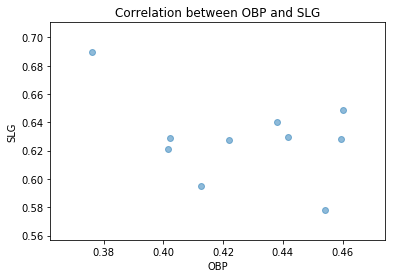

In [36]:
slg = [0.648752, 0.628450, 0.640385, 0.629353, 0.689815, 0.627306, 0.577818, 0.629174, 0.621269, 0.595238] 
obp = [0.460245, 0.459638, 0.438111, 0.441815, 0.376278, 0.421829, 0.454031, 0.402157, 0.401600, 0.412602] 


plt.scatter(obp, slg, alpha=0.5)
plt.xlabel('OBP')
plt.ylabel('SLG')
plt.title('Correlation between OBP and SLG')


plt.show()

This is where OPS is interesting. OBP and SLG are clearly to two most important statistics for a hitter, but why is OPS a flawed stat? The reason why OPS isn't the greatest statistic to measure a hitter because it makes on OBP and SLG on the same level. Their value is equal. I am not sure if that is the case. For instance, in 2017 JD Martinez had a .689 slugging percentage with a .376 on-base percentage. His OPS that year was 1.066. In 2017 Mike Trout had a .629 slugging percentage and a .441 on-base percentage. His OPS that year was 1.071. Martinez and Trout's OPS are very similar, but how they got their is very different. Looking at an OPS leaderboard lacks the context for each player given how getting this number has so many variables. OPS will overrate power hitters while underrating high on-base players. This can be viewed on the chart above.

### OPS+ Leaders

OPS+ is a player's OPS adjusted to park factors and league averages. To further clarify, league average is 100, so a player with a 150 OPS+ means they are 50% more productive than the average hitter in the MLB.

Calculation: OPS+ = 100 * (OBP/lgOBP + SLG/lgSLG - 1)

In [37]:
(atbats[atbats['AB']>400].groupby(['batter_id', 'year']).tail(n=1)
                                               .sort_values(by='OPS+', ascending=False)
                                               .set_index(['year', 'batter_id'])
                                                [['AB', 'H', '2B', '3B', 'HR', 'BB', 
                                                  'IBB', 'K', 'AVG', 'SLG', 'OBP', 'OPS', 
                                                  'OPS+', 'first_name_batter',
                                                  'last_name_batter']]
                                               .head(n=10))

AB    H  2B  3B  HR   BB  IBB    K       AVG       SLG  \
year batter_id                                                            
2015 547180     521  172  38   1  42  124   15  131  0.330134  0.648752   
2018 545361     471  147  24   4  39  122   25  124  0.312102  0.628450   
     605141     520  180  47   5  32   81    8   91  0.346154  0.640385   
2017 545361     402  123  25   3  33   94   15   90  0.305970  0.629353   
     502110     432  131  26   3  45   53    8  128  0.303241  0.689815   
     592450     542  154  24   3  52  127   11  208  0.284133  0.627306   
     458015     559  179  34   1  36  134   20   83  0.320215  0.577818   
2018 502110     569  188  37   2  43   69   11  146  0.330404  0.629174   
2016 120074     536  169  48   1  38   80   15   84  0.315299  0.621269   
2015 458015     545  171  33   2  29  143   15  135  0.313761  0.541284   

                     OBP       OPS        OPS+ first_name_batter  \
year batter_id                                                     
2015 547180     0.460245  1.108997  200.529931             Bryce   
2018 545361     0.459638  1.088088  195.436281              Mike   
     605141     0.438111  1.078495  191.591883            Mookie   
2017 545361     0.441815  1.071168  190.084750              Mike   
     502110     0.376278  1.066093  184.208848              J.D.   
     592450     0.421829  1.049135  183.344788             Aaron   
     458015     0.454031  1.031849  181.454176              Joey   
2018 502110     0.402157  1.031331  177.648508              J.D.   
2016 120074     0.401600  1.022869  175.564893             David   
2015 458015     0.458993  1.000277  174.180277              Joey   

               last_name_batter  
year batter_id                   
2015 547180              Harper  
2018 545361               Trout  
     605141               Betts  
2017 545361               Trout  
     502110            Martinez  
     592450               Judge  
     458015               Votto  
2018 502110            Martinez  
2016 120074               Ortiz  
2015 458015               Votto

Even though OPS is a flawed stat, looking at the leaders in OPS+ can show how dominant a player is at the plate. It just isn't the best way to measure performance. But since these players continue to show up on every leaderboard, we will use it. The top hitters in Major League Baseball from 2015 - 2018 were....

Mike Trout, Bryce Harper, Mookie Betts, Aaron Judge, JD Martinez and Joey Votto

# Analyzing the Top Pitcher and Hitter

Now we will analyze these two players to figure out why they are considered the best players in Major League Baseball.

## Clayton Kershaw

In [38]:
(atbats[atbats['last_name_pitcher'] == 'Kershaw'].groupby(['pitcher_id', 'year'])
                        .tail(n=1)
                        .sort_values(by='year').set_index(['year', 'pitcher_id'])
                         [['IP', 'WHIP', 'FIP', 'opp_AVG',
                           'opp_OBP', 'opp_SLG', 'opp_OPS',
                           'opp_K%', 'opp_BB%']]
                        .head(n=4))

,,IP,WHIP,FIP,opp_AVG,opp_OBP,opp_SLG,opp_OPS,opp_K%,opp_BB%
year,pitcher_id,,,,,,,,,
2015,477132,232.666667,0.881089,2.056734,0.194279,0.237020,0.283671,0.520691,0.358760,0.050060
2016,477132,149.000000,0.724832,1.851007,0.184411,0.203704,0.268061,0.471765,0.326996,0.020913
2017,477132,175.000000,0.948571,3.114286,0.212168,0.246291,0.357254,0.603545,0.315133,0.046802
2018,477132,161.333333,1.041322,3.224793,0.227124,0.263566,0.366013,0.629579,0.253268,0.047386


<function matplotlib.pyplot.show(*args, **kw)>

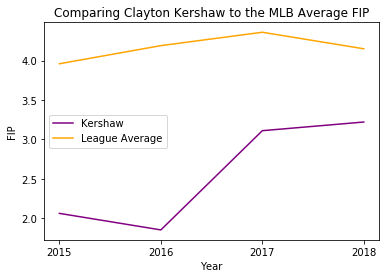

In [39]:
year = [2015, 2016, 2017, 2018]
kershaw_fip = [2.06, 1.85, 3.11, 3.22]
average_fip = [3.96, 4.19, 4.36, 4.15]

plt.plot(year, kershaw_fip, color='purple', label='Kershaw')
plt.plot(year, average_fip, color='orange', label='League Average')
plt.legend(loc='center left')

plt.xticks(np.arange(min(year), max(year)+1, 1.0))

plt.xlabel('Year')
plt.ylabel('FIP')
plt.title('Comparing Clayton Kershaw to the MLB Average FIP')

plt.show

At his peak, Clayton Kershaw was the best pitcher in the game. It is obvious how much better he was than the average major league pitcher in 2015 and 2016. It appears his skill is declining, but in 2017 and 2018 he was still much better than the average pitcher. He was supposed to give up 1 or 2 less runs in all four seasons than the average. 

## Mike Trout

In [40]:
(atbats[atbats['last_name_batter'] == 'Trout'].groupby(['batter_id', 'year'])
                                               .tail(n=1)
                                               .sort_values(by='year')
                                               .set_index(['year', 'batter_id'])
                                                [['AB', 'H', '2B', '3B', 'HR', 'BB', 
                                                  'IBB', 'K', 'AVG', 'SLG', 'OBP', 'OPS', 
                                                  'OPS+', 'K%', 'BB%']]
                                               .head(n=4))

,,AB,H,2B,3B,HR,BB,IBB,K,AVG,SLG,OBP,OPS,OPS+,K%,BB%
year,batter_id,,,,,,,,,,,,,,,
2015,545361,575,172,32,6,41,92,14,158,0.299130,0.589565,0.401760,0.991325,167.956911,0.274783,0.160000
2016,545361,549,173,32,5,29,116,12,137,0.315118,0.550091,0.440529,0.990620,170.537438,0.249545,0.211293
2017,545361,402,123,25,3,33,94,15,90,0.305970,0.629353,0.441815,1.071168,190.084750,0.223881,0.233831
2018,545361,471,147,24,4,39,122,25,124,0.312102,0.628450,0.459638,1.088088,195.436281,0.263270,0.259023


<function matplotlib.pyplot.show(*args, **kw)>

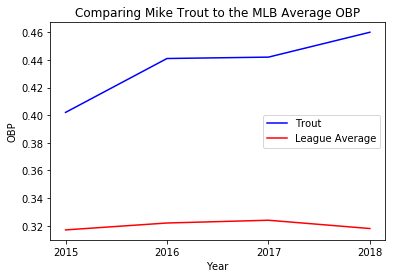

In [41]:
year = [2015, 2016, 2017, 2018]
trout_obp = [.402, .441, .442, .460]
league_obp = [.317, .322, .324, .318]

plt.plot(year, trout_obp, color='blue', label='Trout')
plt.plot(year, league_obp, color='red', label='League Average')
plt.legend(loc='right')

plt.xticks(np.arange(min(year), max(year)+1, 1.0))

plt.xlabel('Year')
plt.ylabel('OBP')
plt.title('Comparing Mike Trout to the MLB Average OBP')

plt.show

Mike Trout's on-base percentage is well above the league average. He is the best hitter in the game and is only getting better with a staggering .460 OBP. While he is getting better every single season, the league appears to be getting slightly worse. This is the sign of an outstanding player.

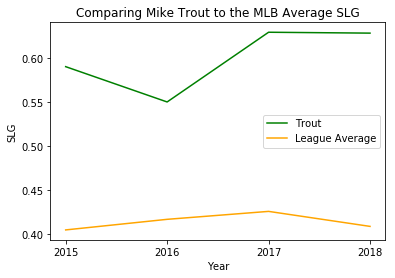

In [42]:
year = [2015, 2016, 2017, 2018]
trout_slg = [.590, .550, .629, .628]
league_slg = [.405, .417, .426, .409]

plt.plot(year, trout_slg, color='green', label='Trout')
plt.plot(year, league_slg, color='orange', label='League Average')
plt.legend(loc='right')

plt.xticks(np.arange(min(year), max(year)+1, 1.0))

plt.xlabel('Year')
plt.ylabel('SLG')
plt.title('Comparing Mike Trout to the MLB Average SLG')

plt.show()

Mike Trout's slugging percentage has been more inconsistent than his OBP, but it is still way above average. Again when the league average goes down, his does not see a change. Given that he can hit get on-base at a high clip and hit for power makes him a special player. It is why he is the best hitter in Major League Baseball.

# Conclusion

In conclusion, the best statistics to measure a hitter is a combination of on-base percentage and slugging percentage. OPS isn't necissarily the best stat to use because of the variables involved. The best players in the major leagues from 2015-2018 were Mike Trout and Clayton Kershaw. 